ROCHETTE
LEVEQUE

# Chargement des Données

Nous importons le dataset pour obtenir une vue d'ensemble de ses caractéristiques et de ses variables.

In [1]:
data <- read.csv("../data/support2.csv")
head(data)

,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,edu,⋯,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
,<dbl>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,⋯,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>
1,62.84998,0,male,0,5,2029,Lung Cancer,Cancer,0,11,⋯,1.1999512,141,7.459961,NA,NA,NA,7,7,,7
2,60.33899,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,12,⋯,5.5000000,132,7.250000,NA,NA,NA,NA,1,<2 mo. follow-up,1
3,52.74698,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,12,⋯,2.0000000,134,7.459961,NA,NA,NA,1,0,<2 mo. follow-up,0
4,42.38498,1,female,0,3,133,Lung Cancer,Cancer,2,11,⋯,0.7999268,139,NA,NA,NA,NA,0,0,no(M2 and SIP pres),0
5,79.88495,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,NA,⋯,0.7999268,143,7.509766,NA,NA,NA,NA,2,no(M2 and SIP pres),2
6,93.01599,1,male,1,4,4,Coma,Coma,1,14,⋯,0.6999512,140,7.659180,NA,NA,NA,NA,1,<2 mo. follow-up,1


# Description des Variables

Le dataset contient `nrow(data)` observations et `ncol(data)` variables. Voici une description des principales variables :

1.  **Variables Démographiques**

    -   `age` : Âge du patient (numérique).

    -   `sex` : Genre du patient (catégorique - "male" ou "female").

    -   `edu` : Niveau d'éducation, avec des valeurs manquantes.

    -   `income` : Niveau de revenu, également avec un nombre important de valeurs manquantes.

2.  **État de santé et résultats**

    -   `death` et `hospdead` : Indicateurs de mortalité (binaire).

    -   `slos` : Durée de séjour à l'hôpital.

    -   `d.time` : Durée jusqu’au décès ou au dernier suivi.

    -   `dzgroup` et `dzclass` : Variables catégorielles spécifiant le groupe de maladie et la classe.

3.  **Mesures cliniques**

    -   `sps`, `aps`, `scoma` : Scores représentant l'état de santé et le niveau de coma.

    -   Signes vitaux tels que `meanbp` (pression artérielle moyenne), `hrt` (fréquence cardiaque), `resp` (taux de respiration) et `temp` (température).

    -   Résultats de tests de laboratoire : `pafi`, `alb`, `bili`, `crea`, `sod`, `ph`, `glucose`, `bun` et `urine`.

4.  **Fonctionnalité et suivi**

    -   `adlp` et `adls` : Scores des activités de la vie quotidienne, avec de nombreuses valeurs manquantes.

    -   `sfdm2` : Statut de suivi, également avec quelques valeurs manquantes.

# Analyse des valeurs manquantes

Nous examinons le nombre de valeurs manquantes pour chaque variable.

In [2]:
missing_data_summary <- sapply(data, function(x) sum(is.na(x)))
missing_data_summary <- sort(missing_data_summary[missing_data_summary > 0], decreasing = TRUE)
missing_data_summary

adlp   urine glucose     bun totmcst     alb    adls    bili    pafi      ph 
   5641    4862    4500    4352    3475    3372    2867    2601    2325    2284 
  prg2m     edu   prg6m  totcst    wblc charges avtisst    crea  dnrday   scoma 
   1649    1634    1633     888     212     172      82      67      30       1 
    sps     aps  surv2m  surv6m  meanbp     hrt    resp    temp     sod 
      1       1       1       1       1       1       1       1       1

Les variables avec des valeurs manquantes significatives sont :

-   `edu` (niveau d'éducation),

-   `income`,

-   `pafi` (pression partielle en oxygène artériel),

-   `alb` (albumine),

-   `glucose`,

-   `bun` (azote uréique sanguin),

-   `urine`,

-   `adlp` et `adls` (scores d'activités de la vie quotidienne).

# Analyse des valeurs aberrantes

Pour détecter les valeurs aberrantes, nous analysons les valeurs situées en dehors de 1,5 fois l'écart interquartile (IQR).

In [3]:
find_outliers <- function(series) {
  q1 <- quantile(series, 0.25, na.rm = TRUE)
  q3 <- quantile(series, 0.75, na.rm = TRUE)
  iqr <- q3 - q1
  lower_bound <- q1 - 1.5 * iqr
  upper_bound <- q3 + 1.5 * iqr
  return(sum(series < lower_bound | series > upper_bound, na.rm = TRUE))
}

outliers_summary <- sapply(data[, sapply(data, is.numeric)], find_outliers)
outliers_summary <- sort(outliers_summary[outliers_summary > 0], decreasing = TRUE)
outliers_summary

scoma diabetes     hday     crea     bili  charges   dnrday     slos 
    1955     1778     1543      987      926      912      799      768 
  totcst  totmcst     wblc     resp   surv2m dementia      sps  glucose 
     749      495      399      313      307      296      283      272 
  d.time      bun       ph      sod      edu      aps     adlp    urine 
     267      267      260      256      199      178      149       92 
    pafi      age  avtisst      hrt   num.co      alb     temp   meanbp 
      90       56       43       40       25       15       14        6

# Interprétation des valeurs aberrantes

Les variables présentant le plus grand nombre de valeurs aberrantes sont :

-   `slos` : Durée de séjour, avec des valeurs extrêmes suggérant que certains patients ont eu de très longues hospitalisations.

-   `charges` et `totcst` : Frais hospitaliers avec des valeurs particulièrement élevées pour certains patients.

-   Les indicateurs de santé, tels que `bili`, `crea`, `glucose` et `bun`, présentent également des valeurs extrêmes, ce qui peut refléter des anomalies dans les conditions de santé de certains patients.

# Conclusion

Cette analyse descriptive permet d’identifier les variables avec des valeurs manquantes et des valeurs aberrantes, fournissant une base pour des traitements ultérieurs des données et des analyses plus approfondies.


# Valeurs manquantes

on supprime toutes les colonnes avec des valeurs manquantes

In [26]:
data_clean <- data[, colSums(is.na(data)) == 0]
head(data_clean)

,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,income,race,hday,diabetes,dementia,ca,dnr,sfdm2,adlsc
,<dbl>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>
1,62.84998,0,male,0,5,2029,Lung Cancer,Cancer,0,$11-$25k,other,1,0,0,metastatic,no dnr,,7
2,60.33899,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,$11-$25k,white,3,0,0,no,,<2 mo. follow-up,1
3,52.74698,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,under $11k,white,4,0,0,no,no dnr,<2 mo. follow-up,0
4,42.38498,1,female,0,3,133,Lung Cancer,Cancer,2,under $11k,white,1,0,0,metastatic,no dnr,no(M2 and SIP pres),0
5,79.88495,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,,white,3,0,0,no,no dnr,no(M2 and SIP pres),2
6,93.01599,1,male,1,4,4,Coma,Coma,1,,white,1,0,0,no,no dnr,<2 mo. follow-up,1


On supprime dnr car issue d'un modèle précédent

In [9]:
data_clean <- data_clean[, !names(data_clean) %in% "dnr"]
head(data_clean)

,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,income,race,hday,diabetes,dementia,ca,sfdm2,adlsc
,<dbl>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<dbl>
1,62.84998,0,male,0,5,2029,Lung Cancer,Cancer,0,$11-$25k,other,1,0,0,metastatic,,7
2,60.33899,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,$11-$25k,white,3,0,0,no,<2 mo. follow-up,1
3,52.74698,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,under $11k,white,4,0,0,no,<2 mo. follow-up,0
4,42.38498,1,female,0,3,133,Lung Cancer,Cancer,2,under $11k,white,1,0,0,metastatic,no(M2 and SIP pres),0
5,79.88495,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,,white,3,0,0,no,no(M2 and SIP pres),2
6,93.01599,1,male,1,4,4,Coma,Coma,1,,white,1,0,0,no,<2 mo. follow-up,1


Régression linéaire

In [10]:
model = lm(death  ~ ., data=data_clean)
summary(model)


Call:
lm(formula = death ~ ., data = data_clean)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.88395 -0.12840  0.02771  0.16224  1.10422 

Coefficients: (3 not defined because of singularities)
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                6.359e-01  5.604e-02  11.348  < 2e-16 ***
age                        2.482e-03  2.343e-04  10.591  < 2e-16 ***
sexmale                    2.108e-02  6.738e-03   3.129 0.001761 ** 
hospdead                   8.259e-02  1.235e-02   6.688 2.40e-11 ***
slos                       5.778e-04  1.713e-04   3.373 0.000747 ***
d.time                    -4.761e-04  7.745e-06 -61.466  < 2e-16 ***
dzgroupCHF                 1.119e-01  1.163e-02   9.628  < 2e-16 ***
dzgroupCirrhosis           1.020e-01  1.588e-02   6.428 1.36e-10 ***
dzgroupColon Cancer        1.985e-01  2.411e-02   8.232  < 2e-16 ***
dzgroupComa                2.535e-02  1.430e-02   1.772 0.076362 .  
dzgroupCOPD                5.09

on va commencer par prendre que les valeurs numériques

In [12]:
data_numeric <- data_clean[, sapply(data_clean, is.numeric)]
head(data_numeric)

,age,death,hospdead,slos,d.time,num.co,hday,diabetes,dementia,adlsc
,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,62.84998,0,0,5,2029,0,1,0,0,7
2,60.33899,1,1,4,4,2,3,0,0,1
3,52.74698,1,0,17,47,2,4,0,0,0
4,42.38498,1,0,3,133,2,1,0,0,0
5,79.88495,0,0,16,2029,1,3,0,0,2
6,93.01599,1,1,4,4,1,1,0,0,1


In [13]:
model = lm(death ~ . , data=data_numeric)
summary(model)


Call:
lm(formula = death ~ ., data = data_numeric)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.83392 -0.08102  0.04134  0.16428  1.12350 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.259e-01  1.671e-02  43.432  < 2e-16 ***
age          2.508e-03  2.257e-04  11.108  < 2e-16 ***
hospdead     8.714e-02  9.095e-03   9.580  < 2e-16 ***
slos        -1.754e-04  1.595e-04  -1.100 0.271263    
d.time      -5.424e-04  7.041e-06 -77.028  < 2e-16 ***
num.co       1.263e-02  2.819e-03   4.482 7.47e-06 ***
hday        -1.637e-04  3.895e-04  -0.420 0.674366    
diabetes    -1.980e-02  9.298e-03  -2.129 0.033268 *  
dementia    -7.010e-02  2.012e-02  -3.484 0.000497 ***
adlsc        1.130e-02  1.781e-03   6.346 2.31e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3229 on 9095 degrees of freedom
Multiple R-squared:  0.5206,	Adjusted R-squared:  0.5202 
F-statistic:  1098 on 9 and 9095 DF,  p

On va faire une matrice de corrélation pour voir si il est utile de faire une régression ridge et/ou lasso

In [15]:
correlation_matrix <- cor(data_numeric)
correlation_matrix

,age,death,hospdead,slos,d.time,num.co,hday,diabetes,dementia,adlsc
age,1.00000000,0.17923034,0.03935385,-0.085518433,-0.13453062,0.12798626,-0.07192299,0.095957528,0.19530277,0.11537935
death,0.17923034,1.00000000,0.40479251,-0.083098125,-0.71048937,0.06863418,0.06384538,0.011939907,0.04439059,0.15476037
hospdead,0.03935385,0.40479251,1.00000000,-0.010578883,-0.48661573,-0.07774640,0.21380429,-0.013185702,0.02583071,0.12634954
slos,-0.08551843,-0.08309812,-0.01057888,1.000000000,0.09690339,-0.11097843,0.20415451,0.006075082,-0.01081974,0.01914290
d.time,-0.13453062,-0.71048937,-0.48661573,0.096903390,1.00000000,-0.04593609,-0.08971790,-0.008119550,-0.05448843,-0.13652140
num.co,0.12798626,0.06863418,-0.07774640,-0.110978429,-0.04593609,1.00000000,-0.08062655,0.387568684,0.13952626,0.14283622
hday,-0.07192299,0.06384538,0.21380429,0.204154507,-0.08971790,-0.08062655,1.00000000,-0.010661795,-0.02839143,0.01554326
diabetes,0.09595753,0.01193991,-0.01318570,0.006075082,-0.00811955,0.38756868,-0.01066179,1.000000000,0.03155356,0.06683614
dementia,0.19530277,0.04439059,0.02583071,-0.010819735,-0.05448843,0.13952626,-0.02839143,0.031553557,1.00000000,0.25314720
adlsc,0.11537935,0.15476037,0.12634954,0.019142898,-0.13652140,0.14283622,0.01554326,0.066836135,0.25314720,1.00000000


Les variables numériques non nulles ne sont pas corrélées entre elles, on ne fait donc pas de ridge/lasso

In [ ]:
for (colonne in names(data_clean)) {
    if (!is.numeric(data_clean[[colonne]])) {
      # Remplacer les catégories par des nombres
      data_clean[[colonne]] <- as.numeric(factor(data_clean[[colonne]])) - 1 
    }
  }
head(data_clean)

,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,income,race,hday,diabetes,dementia,ca,sfdm2,adlsc
,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,62.84998,0,1,0,5,2029,7,1,0,2,4,1,0,0,0,0,7
2,60.33899,1,0,1,4,4,3,3,2,2,5,3,0,0,1,1,1
3,52.74698,1,0,0,17,47,3,3,2,4,5,4,0,0,1,1,0
4,42.38498,1,0,0,3,133,7,1,2,4,5,1,0,0,0,4,0
5,79.88495,0,0,0,16,2029,1,0,1,0,5,3,0,0,1,4,2
6,93.01599,1,1,1,4,4,5,2,1,0,5,1,0,0,1,1,1


maintenant que toutes les variables non numériques sont converties en nombre, on peut faire une régression linéaire

In [22]:
model = lm(death  ~ ., data=data_clean)
summary(model)


Call:
lm(formula = death ~ ., data = data_clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8678 -0.1116  0.0344  0.1630  1.1460 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.007e-01  2.220e-02  31.567  < 2e-16 ***
age          2.521e-03  2.278e-04  11.066  < 2e-16 ***
sex          2.552e-02  6.784e-03   3.761  0.00017 ***
hospdead     9.929e-02  9.530e-03  10.418  < 2e-16 ***
slos         2.778e-04  1.608e-04   1.727  0.08413 .  
d.time      -5.061e-04  7.312e-06 -69.223  < 2e-16 ***
dzgroup      1.392e-02  1.477e-03   9.424  < 2e-16 ***
dzclass      7.011e-03  3.027e-03   2.316  0.02058 *  
num.co       1.530e-02  3.051e-03   5.015 5.40e-07 ***
income      -3.940e-04  2.065e-03  -0.191  0.84867    
race         1.573e-03  2.857e-03   0.550  0.58203    
hday         6.523e-04  3.928e-04   1.661  0.09684 .  
diabetes     9.521e-04  9.332e-03   0.102  0.91874    
dementia    -4.782e-02  1.990e-02  -2.403  0.01628 *  
ca          -6.0

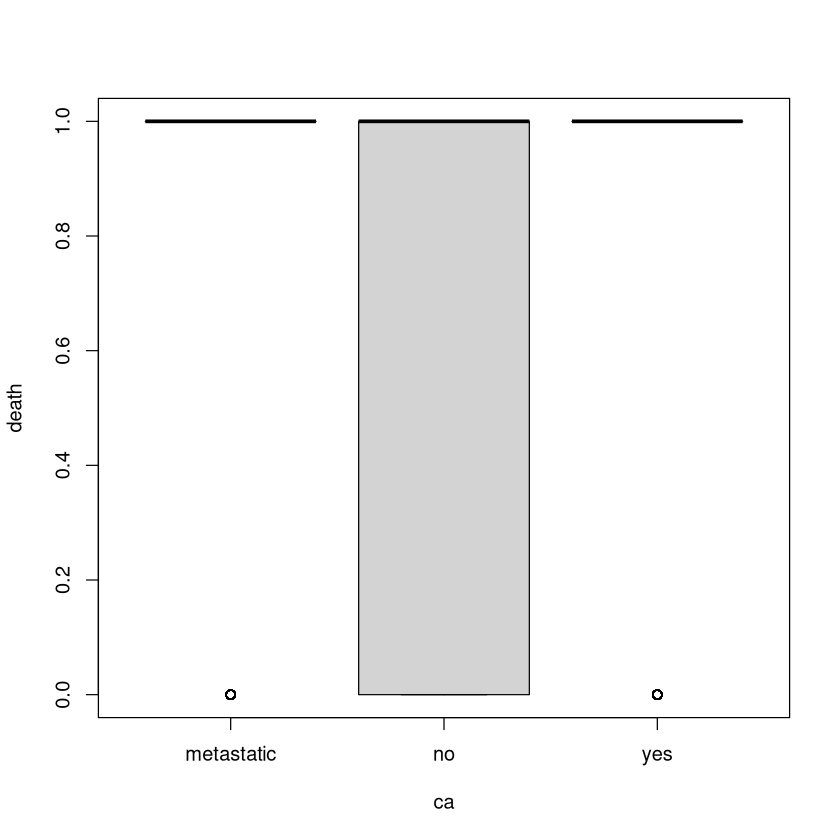

In [27]:
boxplot(death ~ ca, data=data_clean)

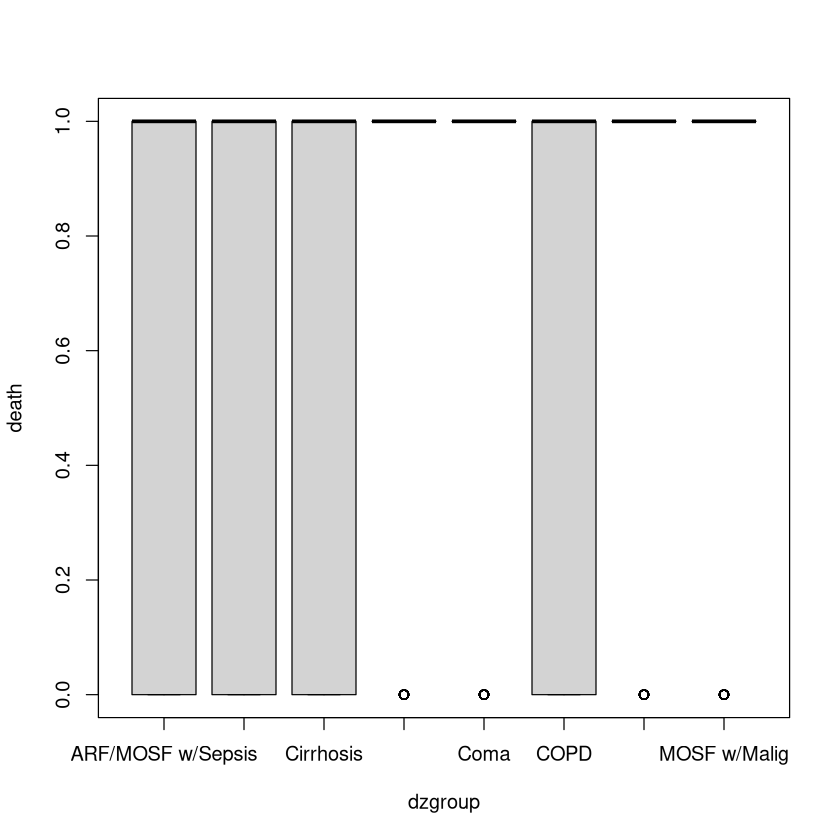

In [28]:
boxplot(death ~ dzgroup, data=data_clean)

# On va utiliser tout le dataset, en rajoutant des valeurs moyennes

In [ ]:
data$pafi[is.na(data$pafi)] <- 333.3
data$alb[is.na(data$alb)] <- 3.5
data$bun[is.na(data$bun) <- 6.51]
data$urine[is.na(data$urine)] <- 2502

[1] NA

pour toutes les autres valeurs numériques manquantes, on met la médianne

In [ ]:
data[] <- lapply(data, function(x) {
  if (is.numeric(x)) {
    x[is.na(x)] <- median(x, na.rm = TRUE) 
  }
  return(x)
})
head(data)

,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,edu,⋯,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
,<dbl>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,62.84998,0,male,0,5,2029,Lung Cancer,Cancer,0,11,⋯,1.1999512,141,7.459961,135,23,2502,7,7,,7
2,60.33899,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,12,⋯,5.5000000,132,7.250000,135,23,2502,0,1,<2 mo. follow-up,1
3,52.74698,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,12,⋯,2.0000000,134,7.459961,135,23,2502,1,0,<2 mo. follow-up,0
4,42.38498,1,female,0,3,133,Lung Cancer,Cancer,2,11,⋯,0.7999268,139,7.419922,135,23,2502,0,0,no(M2 and SIP pres),0
5,79.88495,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,12,⋯,0.7999268,143,7.509766,135,23,2502,0,2,no(M2 and SIP pres),2
6,93.01599,1,male,1,4,4,Coma,Coma,1,14,⋯,0.6999512,140,7.659180,135,23,2502,0,1,<2 mo. follow-up,1


In [38]:
colonnes_chaine <- sapply(data, is.character)

nombres_vides <- sapply(data[, colonnes_chaine], function(x) sum(x == ""))

# Afficher les résultats
resultats <- data.frame(
  colonne = names(nombres_vides),
  nombre_vides = nombres_vides
)
resultats


,colonne,nombre_vides
,<chr>,<int>
sex,sex,0
dzgroup,dzgroup,0
dzclass,dzclass,0
income,income,2982
race,race,42
ca,ca,0
dnr,dnr,30
sfdm2,sfdm2,1400


On retire la colonne income (car trop de valeurs vides), on retire les lignes avec des valeurs vides de race et de dnr.
On va tester avec la colonne sfdm2, amputée des lignes vides, et sans la colonne

In [41]:
data <- data[, !names(data) %in% "income"]
data <- data[, !names(data) %in% "sfdm2"]
data <- na.omit(data)